In [632]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [633]:
data = pd.read_csv('accidents.csv', header = None)

In [634]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,56a72710-563d-410e-a744-468d2421092e,"Forecaster, CAIC",2/20/2018 7:00,Known,Estimated,38.008880,-107.873070,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""Convex Slope""}"
1,6e872258-f60c-47bb-b6eb-484cc0fe3e89,"Forecaster, CAIC",12/19/2024 19:00,Estimated,Unknown,39.682316,-105.930845,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
2,22315e1b-b4cf-4de4-9c1b-9a3d124db2d4,"Forecaster, CAIC",1/22/2012 19:00,Known,Unknown,40.506490,-105.886230,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}
3,4cc8fd48-c67f-40c3-963f-1c3bbed8676b,"Forecaster, CAIC",1/22/2012 7:00,Known,Unknown,39.886920,-105.760660,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50f496f8-21d1-4a6f-a250-8b7c821810c1,"Forecaster, CAIC",1/14/2018 19:00,Known,Unknown,38.689060,-106.355380,f,f,t,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{}


In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       308 non-null    object 
 1   1       296 non-null    object 
 2   2       308 non-null    object 
 3   3       308 non-null    object 
 4   4       294 non-null    object 
 5   5       308 non-null    float64
 6   6       308 non-null    float64
 7   7       42 non-null     object 
 8   8       42 non-null     object 
 9   9       42 non-null     object 
 10  10      308 non-null    object 
 11  11      200 non-null    object 
 12  12      109 non-null    object 
 13  13      308 non-null    object 
 14  14      308 non-null    int64  
 15  15      199 non-null    object 
 16  16      213 non-null    object 
 17  17      308 non-null    object 
 18  18      20 non-null     float64
 19  19      256 non-null    object 
 20  20      285 non-null    object 
 21  21      12 non-null     object 
 22  22

In [636]:
#I used excel to identify the columns worth keeping, then converted their column letters into array positions
#I will keep these columns
cols_to_keep = [2, 5, 6, 19, 20, 30, 46]

avalanche_df = data[cols_to_keep]

#Now we should have the unique accident ID, date, latitude, longitude, avalanche type, aspect, elevation, and slope degree
avalanche_df.head()

,2,5,6,19,20,30,46
0,2/20/2018 7:00,38.008880,-107.873070,HS,N,11400.0,NaN
1,12/19/2024 19:00,39.682316,-105.930845,NaN,W,11600.0,NaN
2,1/22/2012 19:00,40.506490,-105.886230,NaN,NaN,NaN,NaN
3,1/22/2012 7:00,39.886920,-105.760660,NaN,N,10400.0,NaN
4,1/14/2018 19:00,38.689060,-106.355380,SS,NE,11200.0,35.0


In [637]:
#Now I'll name the columns that we want to keep
avalanche_df.columns = ['Date','Latitude','Longitude','Avalanche Type','Aspect','Elevation','Slope Degree']

In [638]:
#Lets check and see how it looks with the column names
avalanche_df.head()

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree
0,2/20/2018 7:00,38.008880,-107.873070,HS,N,11400.0,NaN
1,12/19/2024 19:00,39.682316,-105.930845,NaN,W,11600.0,NaN
2,1/22/2012 19:00,40.506490,-105.886230,NaN,NaN,NaN,NaN
3,1/22/2012 7:00,39.886920,-105.760660,NaN,N,10400.0,NaN
4,1/14/2018 19:00,38.689060,-106.355380,SS,NE,11200.0,35.0


In [639]:
#Lets see how many Avalanche Types (the Y of our model) we are missing
avalanche_df['Avalanche Type'].isna().sum()

52

In [640]:
#Lets compare that to how many non-nan values we have
avalanche_df['Avalanche Type'].count()

256

In [641]:
#And then the total length of the column
len(avalanche_df['Avalanche Type'])

308

In [642]:
#We cannot impute, guess, or leave missing values in the target values unfortunately. This would break the training process of the model. 
#For the sake of this project, I will need to drop the 50 missing rows.
avalanche_df = avalanche_df.dropna(subset = ['Avalanche Type'])


In [643]:
#Next, lets check for duplicate values, the CAIC warned there may be duplicate values reported for avalanche accidents.
#We will start by checking for total duplicate values in the list. Accidents with the same latitude, longitude, and time would be guaranteed duplicates
#So we will remove those. 
duplicates = avalanche_df[avalanche_df.duplicated(['Date','Latitude','Longitude'], keep = False)]
duplicates

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree
156,1/17/2019 7:00,38.808250,-106.413350,SS,E,12000.0,40.0
184,2/22/2025 19:00,39.800478,-105.772558,HS,NW,11470.0,NaN
198,1/17/2019 7:00,38.808250,-106.413350,SS,E,12000.0,40.0
219,2/22/2025 19:00,39.800478,-105.772558,HS,NW,NaN,NaN


In [644]:
#We have two duplicate avalanche accidents reported. Let's remove one.
avalanche_df = avalanche_df.drop_duplicates(['Date','Latitude','Longitude'],keep = False)

In [645]:
#And now I'll check again that it worked:
duplicates = avalanche_df[avalanche_df.duplicated(keep = False)]
duplicates

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree


<Axes: >

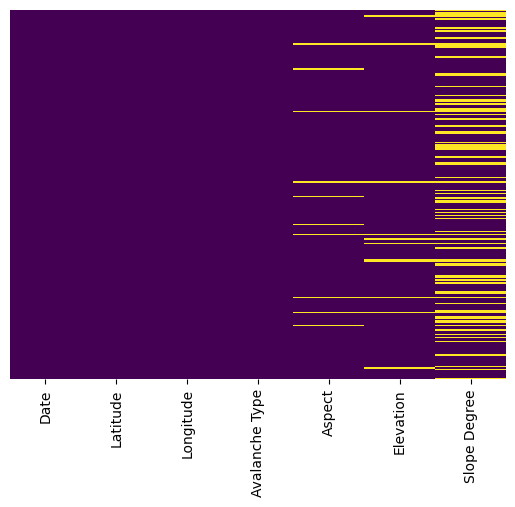

In [646]:
#I like to use this trick to visualize how much missing data we have. It looks like theres a lot of missing slope degree and some missing
#Data from other data types. Thankfully there are no missing dates, latitudes, or longitudes so I think we can feature engineer and fill these in
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [647]:
#I'm going to focus on getting elevation sorted out first. Let me get familiar with elevation

<Axes: ylabel='Elevation'>

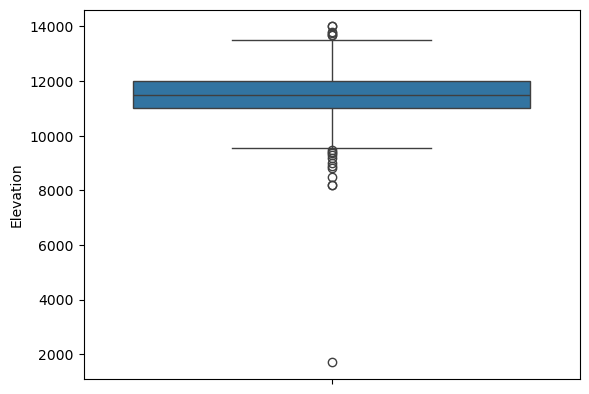

In [648]:
sns.boxplot(avalanche_df, y = 'Elevation')

In [649]:
#It appears the majority of avalanche accidents occur between 11,000 and 12,000 ft which makes sense, that is the majority of the peak elevations 
#within colorado.

In [650]:
#Let me find the < 2000ft outlier. Colorado is generally a minimum of 5280ft so 1700ft doesn't make sense.
avalanche_df['Elevation'].min()

1700.0

In [651]:
#Lets drop that row
avalanche_df = avalanche_df.drop(avalanche_df['Elevation'].idxmin())

In [652]:
#Now check our minimum
avalanche_df['Elevation'].min()

8200.0

In [653]:
#That seems more inline with avalanche elevations

In [654]:
#I found Elevation API that can extract Elevation from latitude and longitude. I'm going to try to use it:

import requests

def get_elevation(lat, lon):
    url = 'https://api.open-elevation.com/api/v1/lookup'
    params = {'locations': f'{lat},{lon}'}
    response = requests.get(url, params=params).json()
    elevation_meters = response['results'][0]['elevation']
    return elevation_meters * 3.28084

In [655]:
#Lets test it against an elevation we know. I will use row 1. 
get_elevation(39.682316, -105.930845)

11630.5778

In [656]:
#It gave us an elevation of 11,630 and our target elevation was 11,600!
#lets run it again on another test point to check it
get_elevation(38.008880, -107.873070)

11994.75104

In [657]:
#Not quite as accurate, it should have been 11,400ft. The free API may not have the highest resolution but it is relatively close
#and is also a free api. For the sake of this project is should work.

In [658]:
#Lets make a function to fill the 52 missing elevation values. I hope this works with their API
def fill_elevation(row):
    if np.isnan(row['Elevation']):
        return get_elevation(row['Latitude'], row['Longitude'])
    else:
        return row['Elevation']

avalanche_df['Elevation'] = avalanche_df.apply(fill_elevation, axis = 1)
        

In [659]:
#It looks like it worked, it filled in the missing values
avalanche_df.head()

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree
0,2/20/2018 7:00,38.00888,-107.87307,HS,N,11400.00000,NaN
4,1/14/2018 19:00,38.68906,-106.35538,SS,NE,11200.00000,35.0
6,3/12/2010 7:00,38.32872,-106.23696,SS,W,12000.00000,NaN
7,3/7/2019 7:00,39.49174,-106.11663,HS,W,11900.00000,NaN
8,11/24/2013 17:30,39.83408,-105.64865,SS,E,11194.22608,NaN


<Axes: >

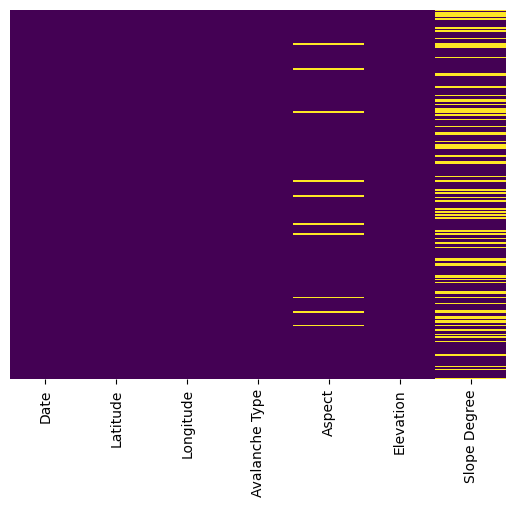

In [660]:
#Lets check
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: ylabel='Elevation'>

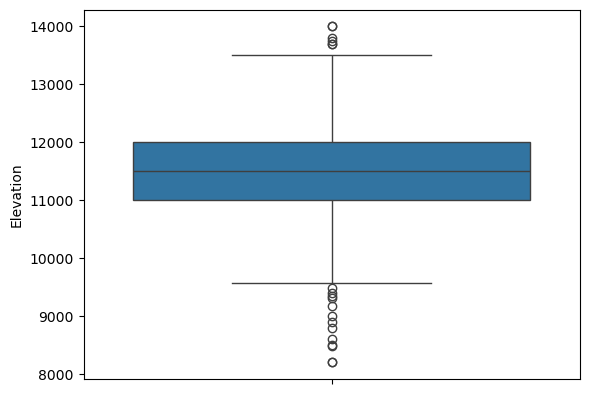

In [661]:
#And then lets check that it actually filled them in and kept our distribution
sns.boxplot(avalanche_df, y = 'Elevation')

In [662]:
#Great, now the last thing to do with the elevation column is set it's data type to integer
avalanche_df['Elevation'] = avalanche_df['Elevation'].astype(int)

In [663]:
#We have a lot of missing Slope Degree data. Slope degree is critical to the probability of an avalanche occurring and what type of avalanche
#may occur so we need to keep this row if we can. 
#I made detailed notes in my log about this, but most avalanches occur between 30 and 45 degrees according to online sources. Let's
#visualize the avalanche slope degrees and see where they are most commonly occuring in our data set.

#It looks like the maximum value of the column is an incorrectly entered slope degree. This was likely meant to be 35 degrees. I am
#going to set it to 35.
print(avalanche_df['Slope Degree'].dropna().max())

355.0


In [664]:
avalanche_df.loc[avalanche_df['Slope Degree'] == 355.0, 'Slope Degree'] = 35.0

In [665]:
print(avalanche_df['Slope Degree'].dropna().max())

50.0


In [666]:
#Great that is a much more reasonable maximum and lies within the range my research showed would be a reasonable max avalanche slope.

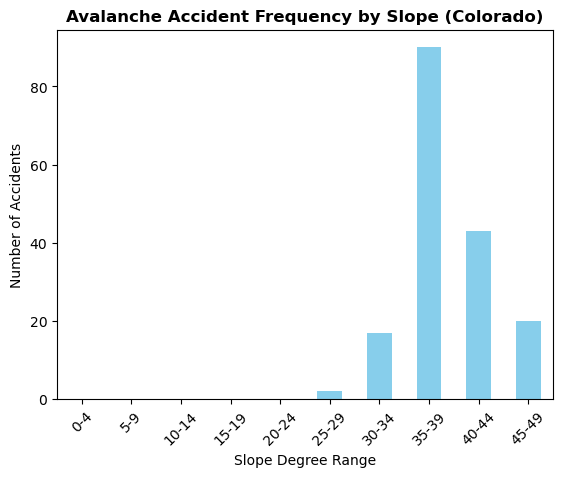

In [667]:
#Ok so now I'll make the bins to visualize where most common avalanches are occuring.

maximum_slope_degree = int(avalanche_df['Slope Degree'].dropna().max())

bins = range(0, maximum_slope_degree + 5, 5) #Create bins in groups of 5 degrees to see where the most avalanches occur.
labels = [f"{d}-{d+4}" for d in bins[:-1]] #Make labels for each of the bins giving a range of degrees in 5 degree increments
bin_df = pd.DataFrame() #I chose to make a separate data frame for this visualization
bin_df['Slope Bin'] = pd.cut(avalanche_df['Slope Degree'].dropna(), bins = bins, labels = labels, right = False) 

bin_counts = bin_df['Slope Bin'].value_counts().sort_index()
bin_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Slope Degree Range')
plt.ylabel('Number of Accidents')
plt.title('Avalanche Accident Frequency by Slope (Colorado)', fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

In [668]:
#Next let's look at what percent of the data each slope degree bin contributes to. I think this could be used
#To make a weighted distribution for filling in missing values
bin_percentages = (bin_counts / bin_counts.sum()) *100
bin_percentages.round(2)

Slope Bin
0-4       0.00
5-9       0.00
10-14     0.00
15-19     0.00
20-24     0.00
25-29     1.16
30-34     9.88
35-39    52.33
40-44    25.00
45-49    11.63
Name: count, dtype: float64

In [669]:
#So what I'll do is create weights from these numbers and also drop any that are 0
bin_weights = bin_percentages / 100
actual_bins = bin_weights[bin_weights > 0] 
actual_bins

Slope Bin
25-29    0.011628
30-34    0.098837
35-39    0.523256
40-44    0.250000
45-49    0.116279
Name: count, dtype: float64

In [670]:
#Alright! Looks like that should work.


#Map the bin labels to numeric range
bin_ranges = {
    '25-29' : (25,29),
    '30-34' : (30, 34),
    '35-39' : (35, 39),
    '40-44' : (40, 44),
    '45-49' : (45, 49)
}

def fill_slope_from_bins(n):
    
    #Make a list of bin labels
    bins = actual_bins.index.tolist() 

    #Get the probability associated with each bin
    degree_probs = actual_bins.values

    #Randomly select n bin labels given the probability of each bin
    selected_bins = np.random.choice(bins, size = n, p = degree_probs)

    #Then for each bin label, draw a random slope degree within that bins range 
    return [
        np.random.uniform(*bin_ranges[bin_label]) #Unpacks the bin range tuple and get a random slope degree within that bin range
        for bin_label in selected_bins
    ]

missing_index = avalanche_df['Slope Degree'].isnull()
avalanche_df.loc[missing_index, 'Slope Degree'] = fill_slope_from_bins(missing_index.sum())

In [671]:
#I'm going to check and see if we have any null values still.
avalanche_df[avalanche_df['Slope Degree'].isnull()]

,Date,Latitude,Longitude,Avalanche Type,Aspect,Elevation,Slope Degree


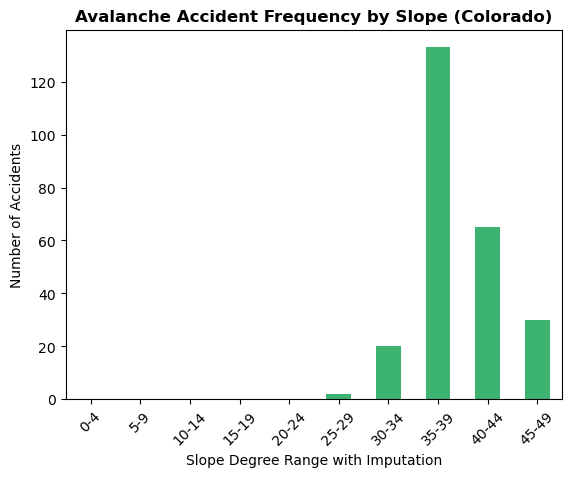

In [672]:
#So now we can look visualize the slope degree distirbution again with a bar plot and make sure we visually follow the 
#same distribution

maximum_slope_degree = int(avalanche_df['Slope Degree'].max())

bins = range(0, maximum_slope_degree + 5, 5)
labels = [f"{d}-{d+4}" for d in bins[:-1]]

bin_df_imputed = pd.DataFrame()
bin_df_imputed['Slope Bin'] = pd.cut(avalanche_df['Slope Degree'], bins = bins, labels = labels, right = False) 
bin_counts_imputed = bin_df_imputed['Slope Bin'].value_counts().sort_index()

bin_counts_imputed.plot(kind='bar', color='mediumseagreen')
plt.xlabel('Slope Degree Range with Imputation')
plt.ylabel('Number of Accidents')
plt.title('Avalanche Accident Frequency by Slope (Colorado)', fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

In [673]:
#It looks like we kept the overall shape but with much more data points and now we have no missing slope degree values

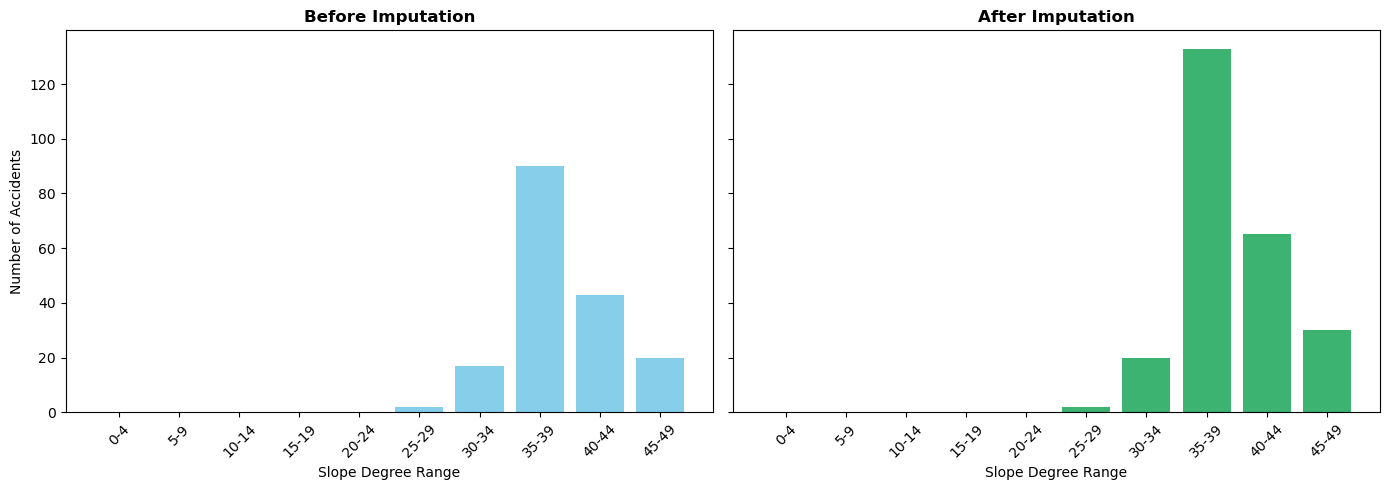

In [674]:
#Lets look at them side by side!
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

#Plot the before imputation
axes[0].bar(labels, bin_counts.values, color='skyblue')
axes[0].set_title('Before Imputation', fontweight='bold')
axes[0].set_xlabel('Slope Degree Range')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

#Plot the after imputation 
axes[1].bar(labels, bin_counts_imputed.values, color='mediumseagreen')
axes[1].set_title('After Imputation', fontweight='bold')
axes[1].set_xlabel('Slope Degree Range')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [675]:
#This is great, we've kept the same distribution of the data but increased our usable data significantly!

<Axes: >

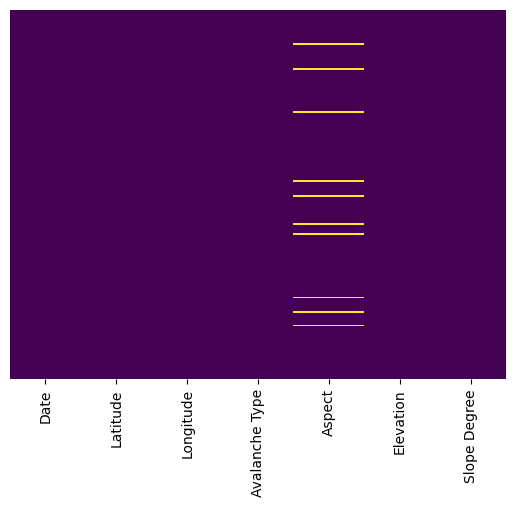

In [676]:
#Lets check where we're at on missing data
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [677]:
#Lets see what percentage of the data each aspect accounts for:

aspect_count = avalanche_df['Aspect'].value_counts()
aspect_pcnt = aspect_count / aspect_count.sum()
aspect_pcnt

Aspect
NE    0.228216
E     0.186722
N     0.161826
NW    0.145228
SE    0.120332
W     0.074689
S     0.070539
SW    0.012448
Name: count, dtype: float64

In [678]:
aspects = aspect_pcnt.index.tolist()

#Get a list of the weights
aspect_probs = aspect_pcnt.values

#Find how many missing values we have - should be 10
number_missing = avalanche_df['Aspect'].isna().sum()

#Now randomly select the weighted aspect
aspects_imputed = np.random.choice(aspects, size = number_missing, p = aspect_probs)

#Now replace the missing indexes in the dataframe with the weightedimputed values
avalanche_df.loc[avalanche_df['Aspect'].isna(), 'Aspect'] = aspects_imputed

<Axes: >

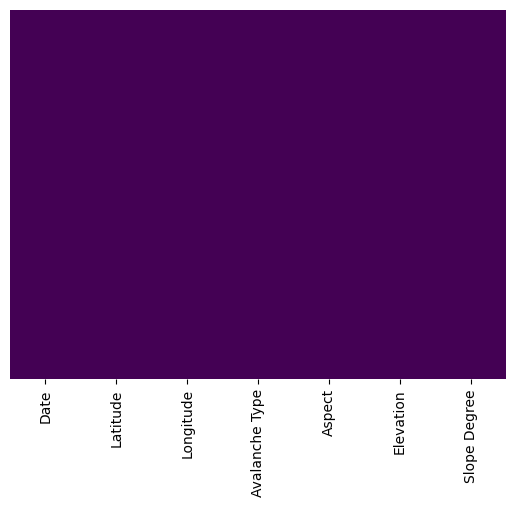

In [679]:
#Lets check now where we're at with missing data
sns.heatmap(avalanche_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [680]:
#Sweet! No missing data. Now I'll break date down into time of day and time of season

In [681]:
avalanche_df['Date'] = pd.to_datetime(avalanche_df['Date'])

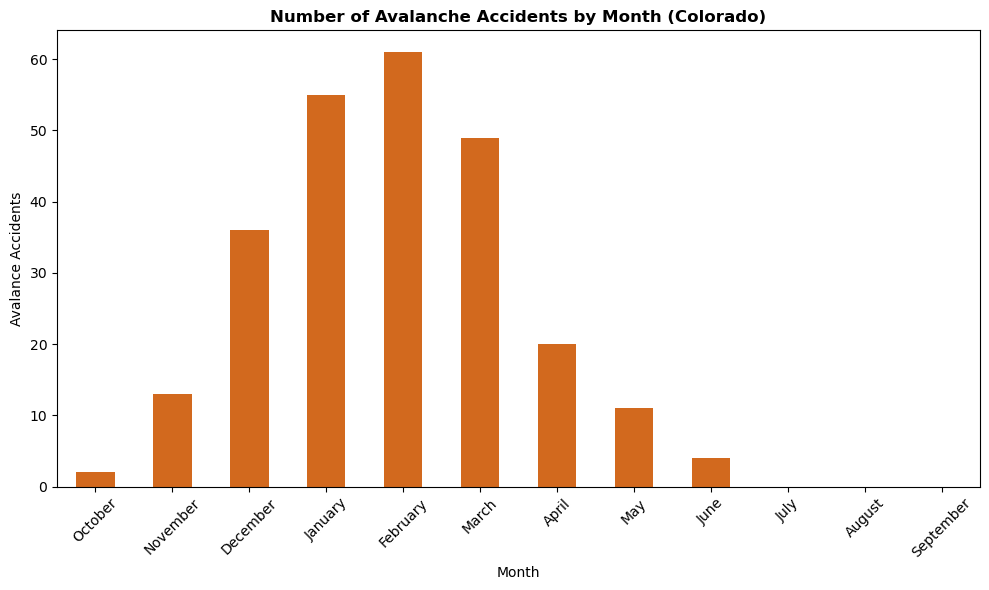

In [682]:
month_df = pd.DataFrame()
month_df['Month'] = avalanche_df['Date'].dt.month_name()

#Count avalanche accidents by month. I'm re-indexing in order from where we would consider the start of the season onwards.
monthly_counts = month_df['Month'].value_counts().reindex([
    'October', 'November', 'December', 'January', 'February', 'March',
    'April', 'May', 'June', 'July', 'August', 'September'
])

monthly_counts.plot(kind='bar', figsize=(10, 6), color='chocolate')
plt.xlabel('Month')
plt.ylabel('Avalance Accidents')
plt.title('Number of Avalanche Accidents by Month (Colorado)', fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

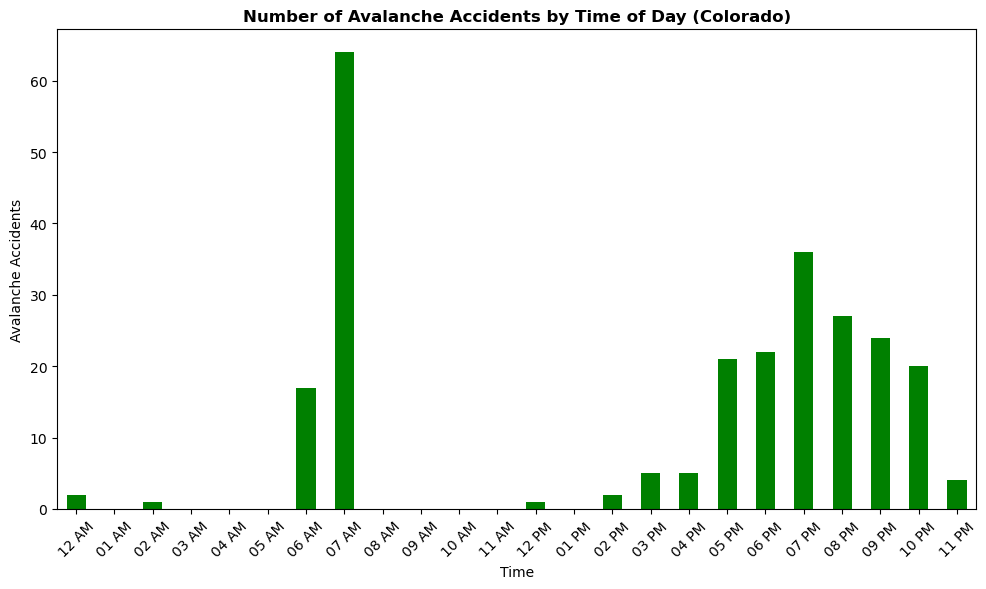

In [683]:
time_df = pd.DataFrame()
time_df['Hour'] = avalanche_df['Date'].dt.strftime('%I %p')

#Set the correct orders for the times (earliest to latest)
hour_order = pd.date_range("00:00", "23:00", freq="h").strftime('%I %p').unique()

#Count the number of accidents reported per hour and sort using the hour order
hour_counts = time_df['Hour'].value_counts().reindex(hour_order, fill_value=0)

#Plot the accidents by the hour from earliest to latest
hour_counts.plot(kind='bar', figsize=(10, 6), color='green')
plt.xlabel('Time')
plt.ylabel('Avalanche Accidents')
plt.title('Number of Avalanche Accidents by Time of Day (Colorado)', fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [684]:
#Interesting!! It looks like time won't be helpful. It's likeley that this is the time the avalanche was recorded, not the time 
#of the incident. The CAIC often reports avalanches on the same day of the event, so it makes sense the majority of avalanche
#accidents time stamps are in the evening. We won't use time as a feature like I originally thought we could.

In [685]:
#I'll write a function to categorize the month into season
def categorize_season(date):
    month = date.month
    if month in [11,12]: #November to December (Early Season)
        return "Early Season"
    elif month in [1,2]: #January to February (Mid Season)
        return "Mid Season"
    elif month in [3,4]: #March to April (Late Season)
        return "Late Season"
    else:
        return "Off Season"

avalanche_df['Season'] = avalanche_df['Date'].apply(categorize_season)

<Axes: xlabel='Season'>

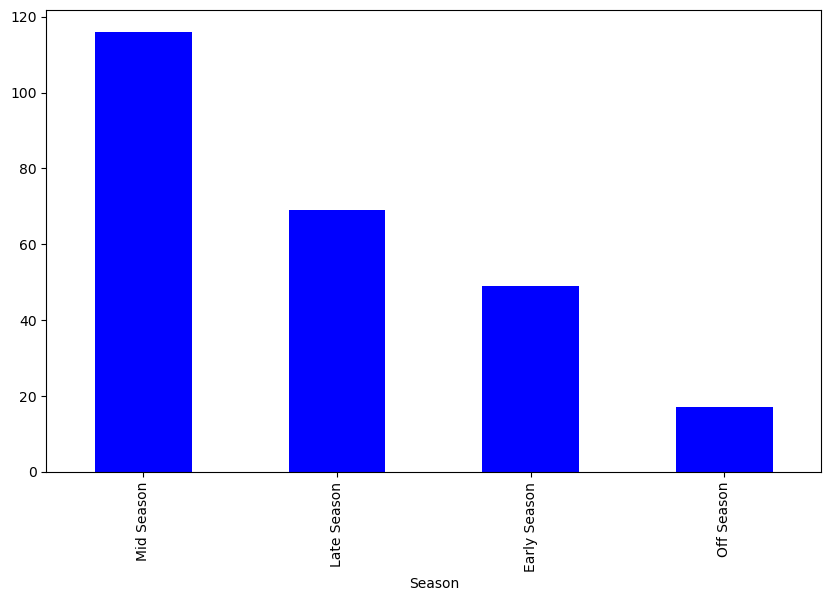

In [686]:
#We can create another visualization and see that the majority of avalanches occurred mid-season, with late season being more likely
#and early / off season being the least accidents. This is inline with my experience as a skier.
avalanche_df['Season'].value_counts().plot(kind='bar', figsize=(10, 6), color='blue')

In [693]:
#And move Season to be the first column. It just makes sense to me.
season_col = avalanche_df.pop('Season')  # Remove the column and save it
avalanche_df.insert(1, 'Season', season_col)  # Insert it at position 0 (first column)

In [694]:
print(avalanche_df.dtypes)

Date              datetime64[ns]
Season                    object
Latitude                 float64
Longitude                float64
Avalanche Type            object
Aspect                    object
Elevation                  int64
Slope Degree             float64
dtype: object


In [695]:
avalanche_df['Season'].unique()

array(['Mid Season', 'Late Season', 'Early Season', 'Off Season'],
      dtype=object)

In [696]:
avalanche_df['Avalanche Type'].unique()

array(['HS', 'SS', 'WL', 'WS', 'U', 'I', 'R', 'L', 'C'], dtype=object)

In [697]:
avalanche_df['Aspect'].unique()


array(['N', 'NE', 'W', 'E', 'NW', 'S', 'SE', 'SW'], dtype=object)

In [704]:
avalanche_df.columns

Index(['Date', 'Season', 'Latitude', 'Longitude', 'Avalanche Type', 'Aspect',
       'Elevation', 'Slope Degree'],
      dtype='object')